In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

C:\Users\yadag\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\yadag\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\yadag\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv(r"D:\Data\Deep_Learning\demo_data\6.overlap.csv", header=None)

In [3]:
data.head()

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


In [4]:
data.shape
data.info()

(100, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
data.duplicated().value_counts()

False    88
True     12
dtype: int64

In [6]:
data.isna().sum()

0    0
1    0
2    0
dtype: int64

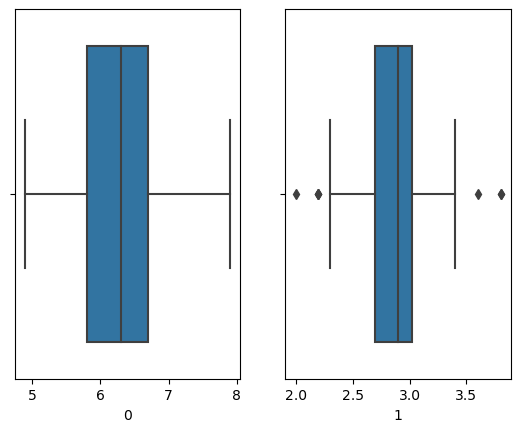

In [7]:
plt.subplot(121)
sns.boxplot(x=data[0])
plt.subplot(122)
sns.boxplot(x=data[1]);

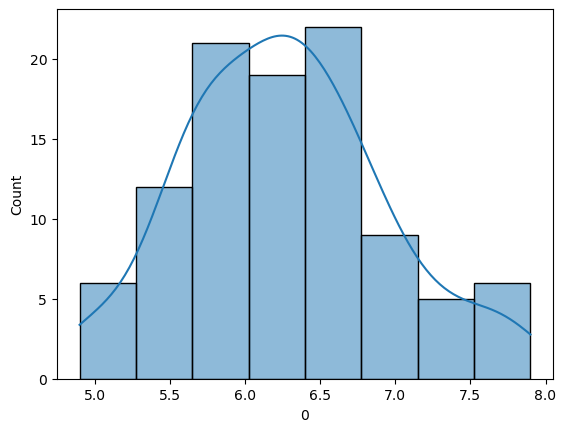

In [8]:
sns.histplot(data[0], kde=True);

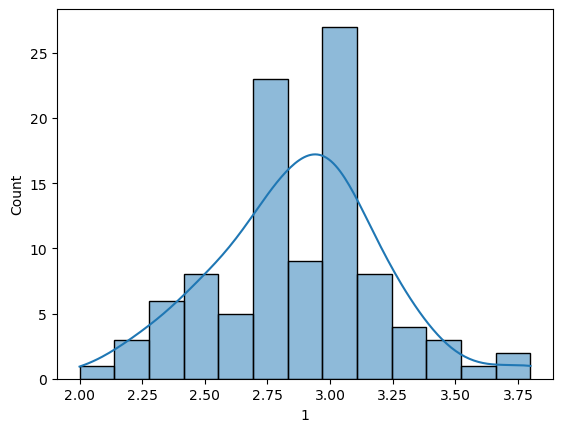

In [9]:
sns.histplot(data[1],kde=True);

In [10]:
data[2].value_counts()

0    50
1    50
Name: 2, dtype: int64

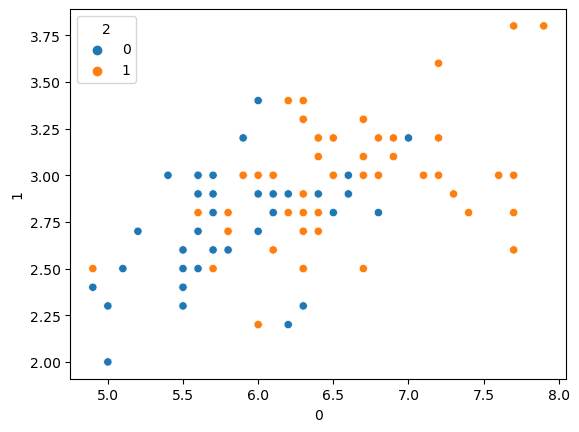

In [11]:
sns.scatterplot(x=data[0], y=data[1], hue=data[2]);

## Feature Transformations

In [12]:
data[3] = np.round(np.log(data[0]),2)
data[4] = np.round(np.log(data[1]),2)
data

,0,1,2,3,4
0,7.0,3.2,0,1.95,1.16
1,6.4,3.2,0,1.86,1.16
2,6.9,3.1,0,1.93,1.13
3,5.5,2.3,0,1.70,0.83
4,6.5,2.8,0,1.87,1.03
...,...,...,...,...,...
95,6.7,3.0,1,1.90,1.10
96,6.3,2.5,1,1.84,0.92
97,6.5,3.0,1,1.87,1.10
98,6.2,3.4,1,1.82,1.22


### columns or features 3 and 4 refers to log values of columns 1 and 2.

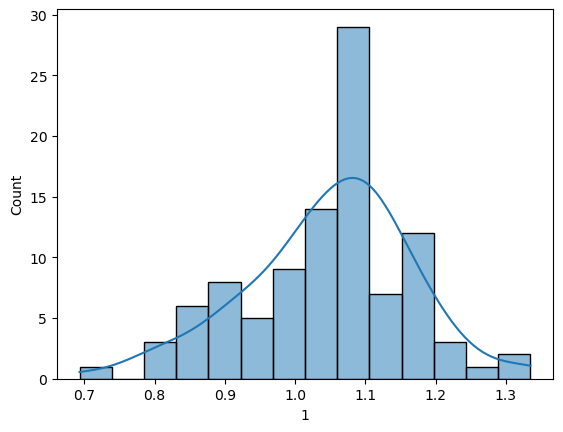

In [13]:
sns.histplot(np.log(data[1]), kde=True);

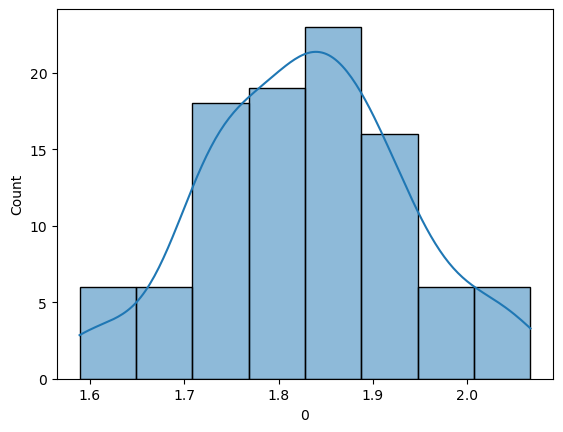

In [14]:
sns.histplot(np.log(data[0]), kde=True);

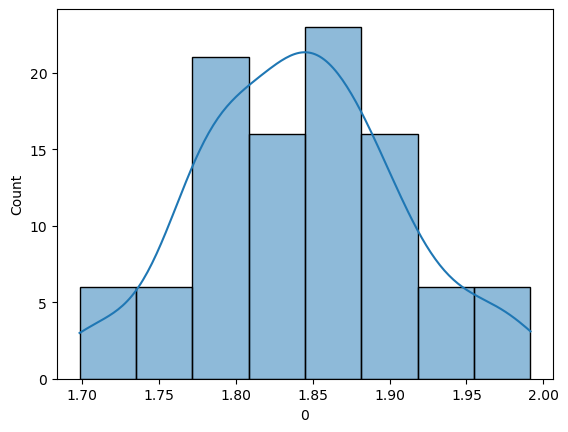

In [15]:
sns.histplot(data[0]**(1/3), kde=True);

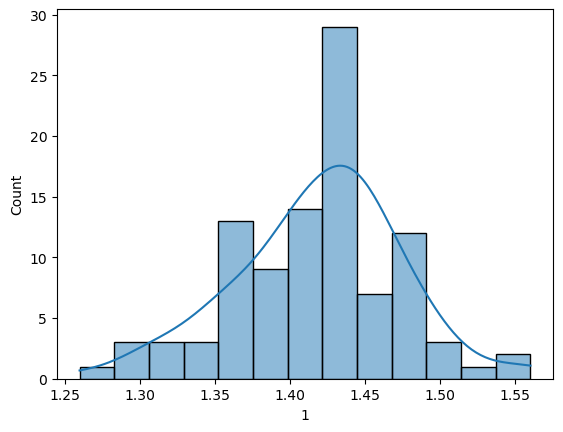

In [16]:
sns.histplot(data[1]**(1/3), kde=True);

In [17]:
import scipy.stats as stats

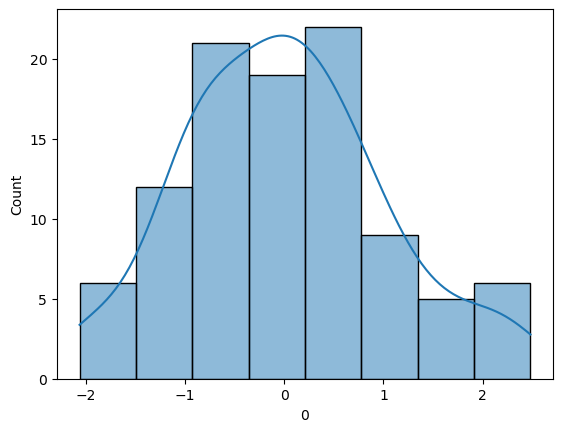

In [18]:
sns.histplot(stats.zscore(data[0]),kde=True);

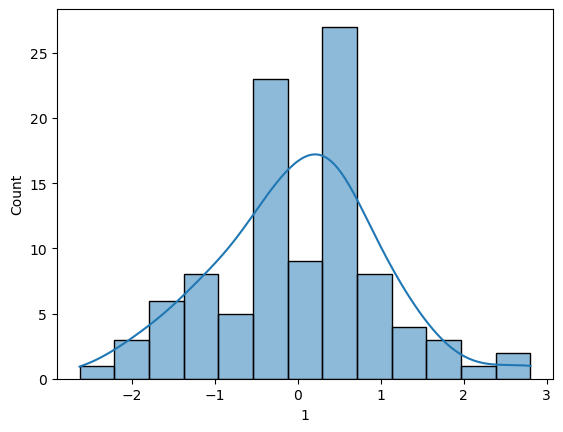

In [19]:
sns.histplot(stats.zscore(data[1]),kde=True);

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
 3   3       100 non-null    float64
 4   4       100 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


## Splitting the data

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[[3,4]],data[2],test_size=0.1)

### Rescaling the features

In [22]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_trans = std.fit_transform(x_train)
x_test_trans = std.transform(x_test)

In [23]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Buliding the model using sigmoid

In [24]:
model = Sequential()
model.add(Dense(4, activation='sigmoid', input_dim = 2))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.get_weights()

[array([[-5.2902627e-01, -7.2961354e-01, -5.1688409e-01, -5.2791858e-01],
        [-4.8750401e-01, -3.2087040e-01, -9.2798948e-02, -5.1188469e-04]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.14094031,  0.7819302 ,  0.6793171 ],
        [-0.7765734 , -0.10932451,  0.70519197],
        [ 0.8042743 ,  0.506686  , -0.16882873],
        [ 0.56794643,  0.36600864, -0.05523878]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.6041634 ,  0.52047396],
        [-0.02912879, -0.9962294 ],
        [ 0.5705589 , -0.9695081 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.90793246],
        [-0.24620569]], dtype=float32),
 array([0.], dtype=float32)]

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='SGD',loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(x_train_trans,y_train,epochs=40,batch_size=10,validation_split=0.2)

Epoch 1/40
8/8 [==============================] - 3s 76ms/step - loss: 0.7563 - accuracy: 0.4861 - val_loss: 0.6715 - val_accuracy: 0.6111
Epoch 2/40
8/8 [==============================] - 0s 8ms/step - loss: 0.7514 - accuracy: 0.4861 - val_loss: 0.6709 - val_accuracy: 0.6111
Epoch 3/40
8/8 [==============================] - 0s 8ms/step - loss: 0.7489 - accuracy: 0.4861 - val_loss: 0.6701 - val_accuracy: 0.6111
Epoch 4/40
8/8 [==============================] - 0s 7ms/step - loss: 0.7456 - accuracy: 0.4861 - val_loss: 0.6694 - val_accuracy: 0.6111
Epoch 5/40
8/8 [==============================] - 0s 8ms/step - loss: 0.7424 - accuracy: 0.4861 - val_loss: 0.6690 - val_accuracy: 0.6111
Epoch 6/40
8/8 [==============================] - 0s 10ms/step - loss: 0.7404 - accuracy: 0.4861 - val_loss: 0.6683 - val_accuracy: 0.6111
Epoch 7/40
8/8 [==============================] - 0s 8ms/step - loss: 0.7366 - accuracy: 0.4861 - val_loss: 0.6680 - val_accuracy: 0.6111
Epoch 8/40
8/8 [================

In [29]:
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 349ms/step


array([[0.4618074 ],
       [0.4618297 ],
       [0.4618744 ],
       [0.46119508],
       [0.46123376],
       [0.46188435],
       [0.46219566],
       [0.46157992],
       [0.46301955],
       [0.4615829 ]], dtype=float32)

In [30]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.4

In [32]:
val_loss = history.history['val_loss']
loss = history.history['loss']

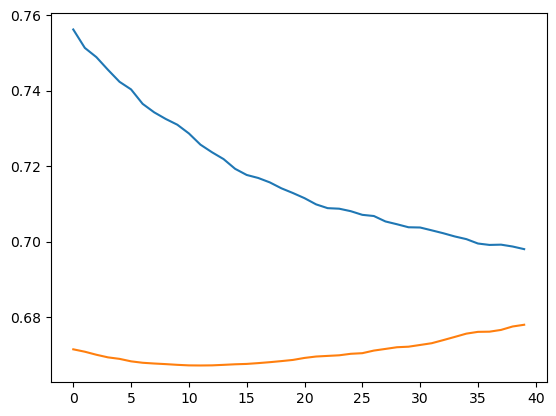

In [33]:
plt.plot(loss)
plt.plot(val_loss)

In [34]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 24s 2ms/step


<AxesSubplot: >

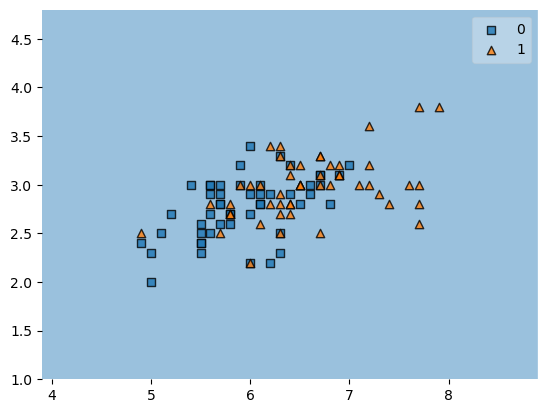

In [35]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 38s 4ms/step


<AxesSubplot: >

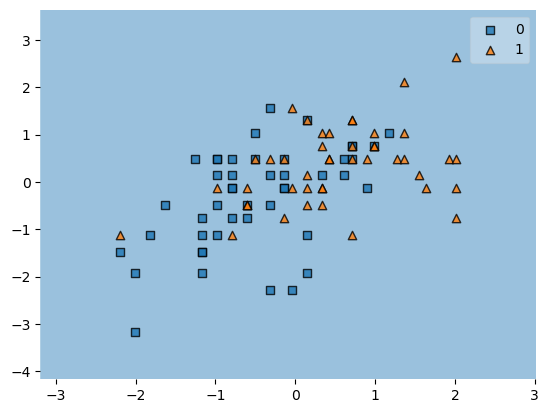

In [36]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

9600/9600 [==============================] - 35s 4ms/step


<AxesSubplot: >

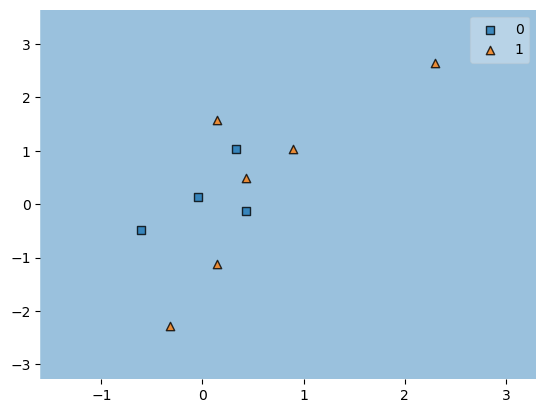

In [37]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the tanh activation func

In [38]:
model = Sequential()
model.add(Dense(3, activation='tanh', input_dim = 2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='tanh'))

In [39]:
model.get_weights()

[array([[-0.19088513,  1.0843623 , -1.0077958 ],
        [-0.2603019 , -0.37254083, -0.04790306]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.24699557,  0.9705725 ],
        [-0.4729823 , -0.43377894],
        [ 1.0124571 ,  0.24050021]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.2081003 ],
        [ 0.41502237]], dtype=float32),
 array([0.], dtype=float32)]

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 2s 66ms/step - loss: 2.7348 - accuracy: 0.5972 - val_loss: 1.1129 - val_accuracy: 0.8333
Epoch 2/50
8/8 [==============================] - 0s 13ms/step - loss: 2.7189 - accuracy: 0.5972 - val_loss: 1.1101 - val_accuracy: 0.8333
Epoch 3/50
8/8 [==============================] - 0s 12ms/step - loss: 2.5619 - accuracy: 0.6389 - val_loss: 1.1081 - val_accuracy: 0.8333
Epoch 4/50
8/8 [==============================] - 0s 12ms/step - loss: 2.5470 - accuracy: 0.6667 - val_loss: 1.1067 - val_accuracy: 0.8333
Epoch 5/50
8/8 [==============================] - 0s 12ms/step - loss: 2.5265 - accuracy: 0.6806 - val_loss: 1.1058 - val_accuracy: 0.8333
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 2.5196 - accuracy: 0.6667 - val_loss: 1.1051 - val_accuracy: 0.8333
Epoch 7/50
8/8 [==============================] - 0s 11ms/step - loss: 2.5132 - accuracy: 0.6667 - val_loss: 1.1044 - val_accuracy: 0.8333
Epoch 8/50
8/8 [===========

In [43]:
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 77ms/step


array([[ 0.56798077],
       [ 0.721766  ],
       [ 0.68332887],
       [-0.48446617],
       [-0.21039446],
       [ 0.71979594],
       [ 0.774263  ],
       [ 0.31920367],
       [ 0.7713652 ],
       [ 0.5315008 ]], dtype=float32)

In [44]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.7

In [46]:
val_loss = history.history['val_loss']
loss = history.history['loss']

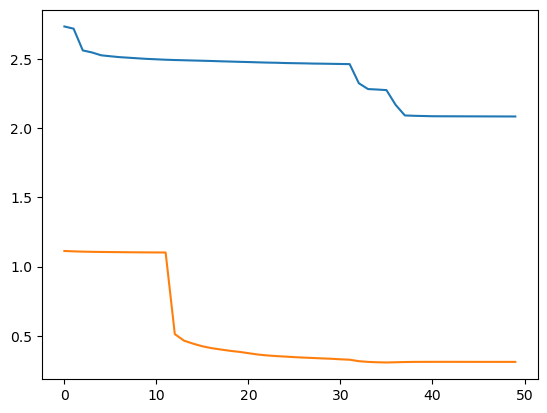

In [47]:
plt.plot(loss)
plt.plot(val_loss)

In [48]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 22s 2ms/step


<AxesSubplot: >

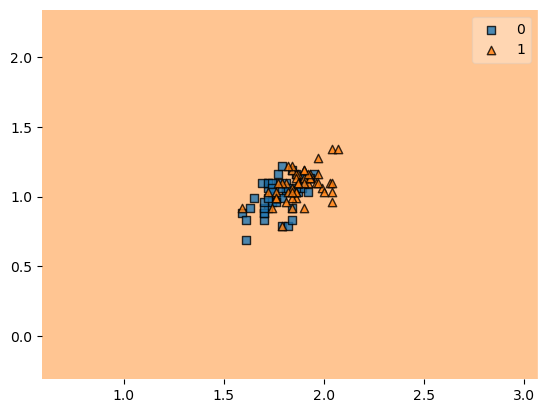

In [49]:
plot_decision_regions(data[[3,4]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 30s 3ms/step


<AxesSubplot: >

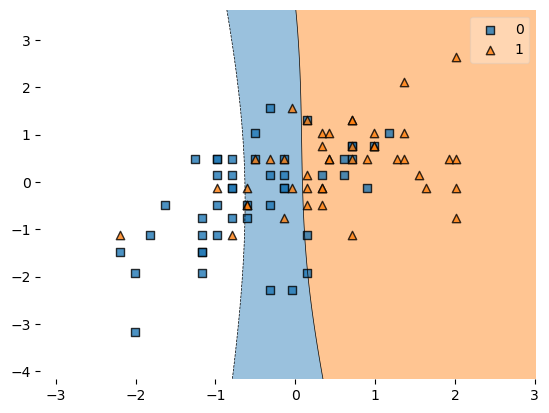

In [50]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 17s 2ms/step


<AxesSubplot: >

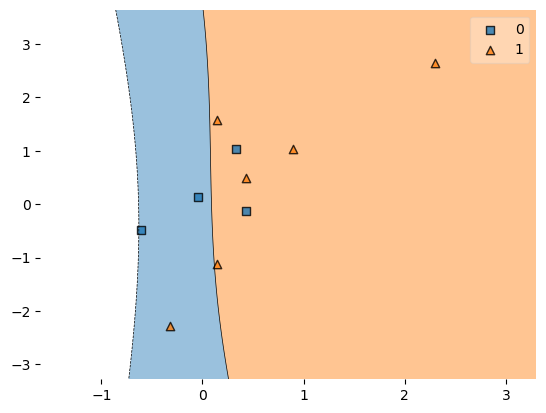

In [51]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the Relu and tanh activation func

In [52]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="tanh"))

In [53]:
model.get_weights()

[array([[ 0.36291373, -0.62510574,  0.42580926,  0.4087999 , -0.78854734],
        [ 0.32992458, -0.6506143 , -0.3336128 ,  0.41607654, -0.02042794]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.2794237 , -0.65228504, -0.32335827,  0.74450004],
        [-0.6836414 ,  0.30538833, -0.7489408 , -0.68035287],
        [ 0.10616159,  0.79934204,  0.15769333,  0.4046539 ],
        [-0.01765716,  0.11065942, -0.10573858,  0.81089425],
        [-0.0696888 ,  0.39327383, -0.26618022,  0.7438743 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.921484  ,  0.93158007],
        [-0.2184565 , -0.15508294],
        [ 0.650403  ,  0.96519804],
        [ 0.6812086 ,  0.0336473 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.02922392],
        [ 0.52545726]], dtype=float32),
 array([0.], dtype=float32)]

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 5)                 15        
                                                                 
 dense_8 (Dense)             (None, 4)                 24        
                                                                 
 dense_9 (Dense)             (None, 2)                 10        
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 2s 47ms/step - loss: 2.5206 - accuracy: 0.4861 - val_loss: 0.8726 - val_accuracy: 0.6111
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 1.6625 - accuracy: 0.4861 - val_loss: 0.7765 - val_accuracy: 0.6111
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 1.4881 - accuracy: 0.4861 - val_loss: 0.7057 - val_accuracy: 0.6111
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 1.3753 - accuracy: 0.4861 - val_loss: 0.6493 - val_accuracy: 0.6111
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 1.2949 - accuracy: 0.4861 - val_loss: 0.6081 - val_accuracy: 0.6111
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 1.2168 - accuracy: 0.4861 - val_loss: 0.5736 - val_accuracy: 0.6111
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 1.1588 - accuracy: 0.5000 - val_loss: 0.5417 - val_accuracy: 0.6111
Epoch 8/50
8/8 [=================

In [57]:
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 97ms/step


array([[0.7525692 ],
       [0.6404614 ],
       [0.6958293 ],
       [0.21894345],
       [0.16403975],
       [0.65994745],
       [0.82279676],
       [0.45183367],
       [0.98218757],
       [0.189221  ]], dtype=float32)

In [58]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0]])

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.6

In [60]:
val_loss = history.history['val_loss']
loss = history.history['loss']

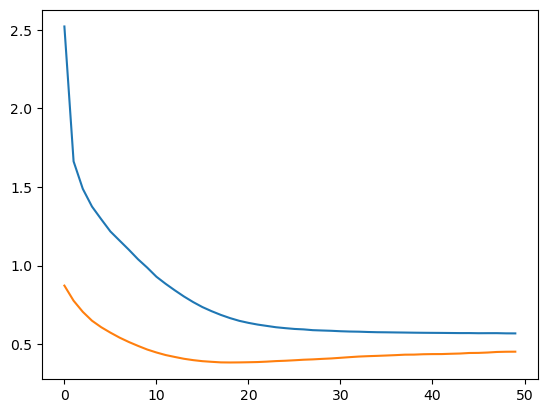

In [61]:
plt.plot(loss)
plt.plot(val_loss)

In [62]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 28s 3ms/step


<AxesSubplot: >

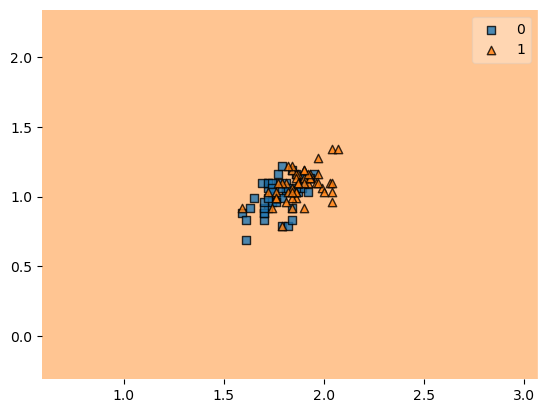

In [63]:
plot_decision_regions(data[[3,4]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 33s 3ms/step


<AxesSubplot: >

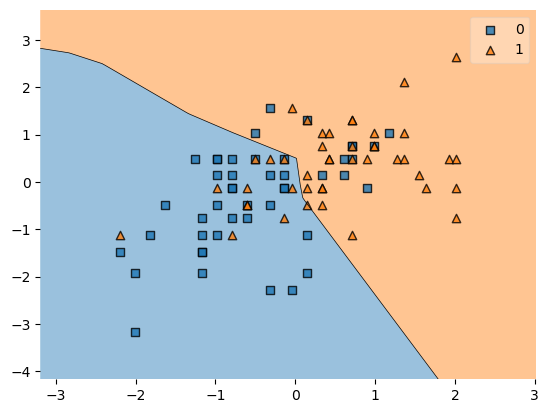

In [64]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

### Desicion Surface on the test data

9600/9600 [==============================] - 17s 2ms/step


<AxesSubplot: >

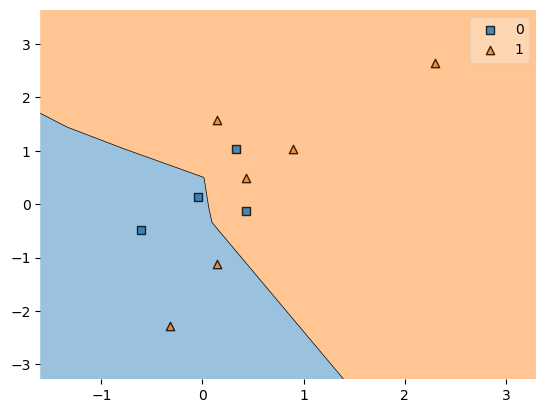

In [65]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### buliding the model with relu func

In [66]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="relu"))

In [67]:
model.get_weights()

[array([[ 0.25966156, -0.6180973 , -0.04012346,  0.08814812, -0.43873718],
        [-0.00752038,  0.25743818,  0.6834878 , -0.7371839 ,  0.01931345]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.7047173 ,  0.4727031 ,  0.12573838, -0.3905701 ],
        [-0.34736532, -0.2702998 ,  0.2955941 ,  0.52628446],
        [-0.64577085, -0.023278  ,  0.25469875, -0.3247667 ],
        [-0.55696976, -0.48971665,  0.41967046,  0.22846425],
        [ 0.15554184, -0.2932011 ,  0.67286575, -0.6379949 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.669564  ,  0.99382114],
        [ 0.37371874,  0.3431735 ],
        [-0.18824434, -0.43770742],
        [ 0.20995378,  0.2118752 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.84018797],
        [ 0.95681036]], dtype=float32),
 array([0.], dtype=float32)]

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5)                 15        
                                                                 
 dense_12 (Dense)            (None, 4)                 24        
                                                                 
 dense_13 (Dense)            (None, 2)                 10        
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 2s 51ms/step - loss: 7.9267 - accuracy: 0.4861 - val_loss: 5.9986 - val_accuracy: 0.6111
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 7.9267 - accuracy: 0.4861 - val_loss: 5.9986 - val_accuracy: 0.6111
Epoch 3/50
8/8 [==============================] - 0s 13ms/step - loss: 7.9267 - accuracy: 0.4861 - val_loss: 5.9986 - val_accuracy: 0.6111
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 7.9267 - accuracy: 0.4861 - val_loss: 5.9986 - val_accuracy: 0.6111
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 7.9267 - accuracy: 0.4861 - val_loss: 5.9986 - val_accuracy: 0.6111
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 7.9267 - accuracy: 0.4861 - val_loss: 5.9986 - val_accuracy: 0.6111
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 7.9267 - accuracy: 0.4861 - val_loss: 5.9986 - val_accuracy: 0.6111
Epoch 8/50
8/8 [===========

In [71]:
#SGD
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 142ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [72]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.4

In [74]:
val_loss = history.history['val_loss']
loss = history.history['loss']

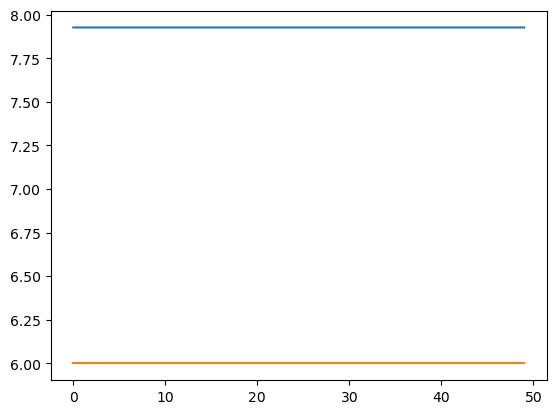

In [75]:
plt.plot(loss)
plt.plot(val_loss)

In [76]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 38s 4ms/step


<AxesSubplot: >

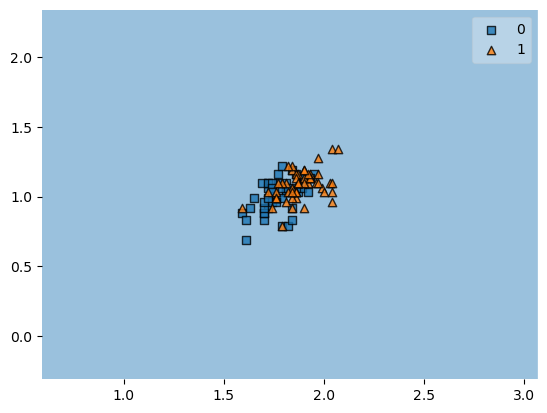

In [77]:
plot_decision_regions(data[[3,4]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 33s 3ms/step


<AxesSubplot: >

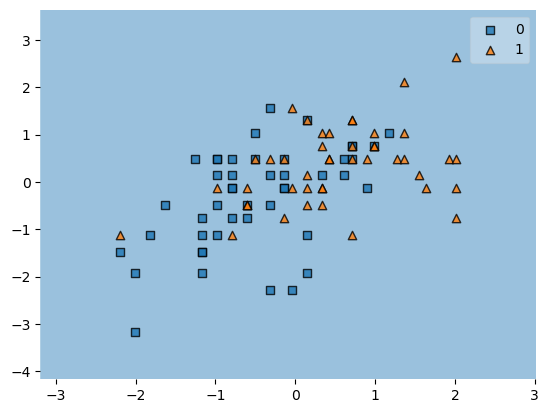

In [78]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

### Desicion Surface on the test data

9600/9600 [==============================] - 25s 3ms/step


<AxesSubplot: >

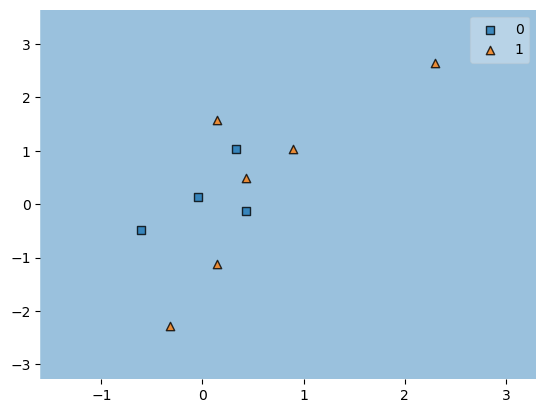

In [79]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

## relu and sigmoid

In [80]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [81]:
model.get_weights()

[array([[-0.50578254,  0.41096234, -0.35015446,  0.66994166, -0.24834043],
        [-0.26902813,  0.63540256, -0.62082136,  0.8805101 , -0.7250403 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.20071626, -0.5745504 , -0.75079834, -0.19483441],
        [ 0.28534722, -0.39524177,  0.23491192,  0.5151459 ],
        [-0.12280977,  0.590323  ,  0.18693209,  0.24721503],
        [-0.15816927, -0.00863564, -0.39684096, -0.20485842],
        [-0.00662786, -0.2291686 , -0.11560398, -0.45099038]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.07883501, -0.61782575],
        [ 0.12188482,  0.02095914],
        [ 0.5048518 , -0.39110112],
        [-0.75627995, -0.89533067]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.29851162],
        [-0.6109196 ]], dtype=float32),
 array([0.], dtype=float32)]

In [82]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 15        
                                                                 
 dense_16 (Dense)            (None, 4)                 24        
                                                                 
 dense_17 (Dense)            (None, 2)                 10        
                                                                 
 dense_18 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer='Rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 1s 44ms/step - loss: 0.6934 - accuracy: 0.4861 - val_loss: 0.6932 - val_accuracy: 0.3889
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.3889
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.3889
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5139 - val_loss: 0.6934 - val_accuracy: 0.3889
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5278 - val_loss: 0.6935 - val_accuracy: 0.3889
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6929 - accuracy: 0.5278 - val_loss: 0.6937 - val_accuracy: 0.3889
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.5278 - val_loss: 0.6939 - val_accuracy: 0.3889
Epoch 8/50
8/8 [=================

In [85]:
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 89ms/step


array([[0.50815696],
       [0.51384014],
       [0.50815696],
       [0.45755404],
       [0.43359345],
       [0.50815696],
       [0.50815696],
       [0.513868  ],
       [0.50815696],
       [0.4808755 ]], dtype=float32)

In [86]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.5

In [88]:
val_loss = history.history['val_loss']
loss = history.history['loss']

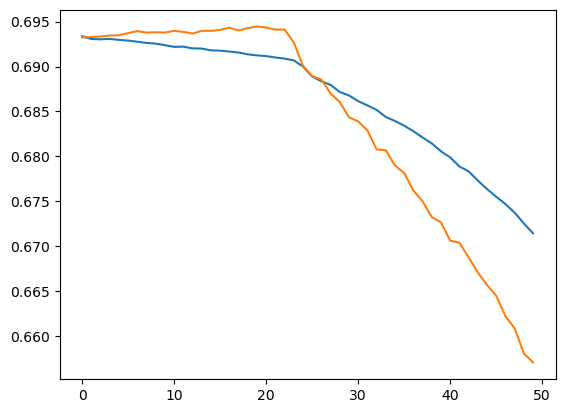

In [89]:
plt.plot(loss)
plt.plot(val_loss)

In [90]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 23s 2ms/step


<AxesSubplot: >

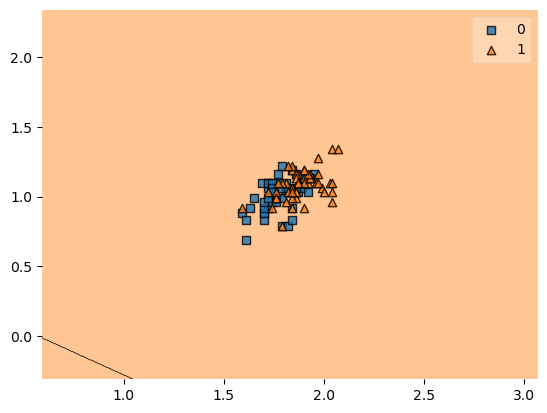

In [91]:
plot_decision_regions(data[[3,4]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 24s 3ms/step


<AxesSubplot: >

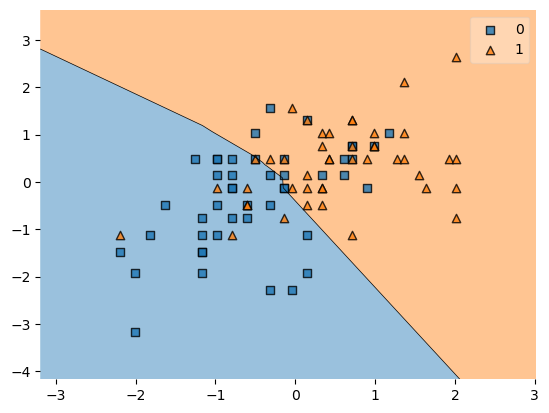

In [92]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

### Desicion Surface on the test data

9600/9600 [==============================] - 30s 3ms/step


<AxesSubplot: >

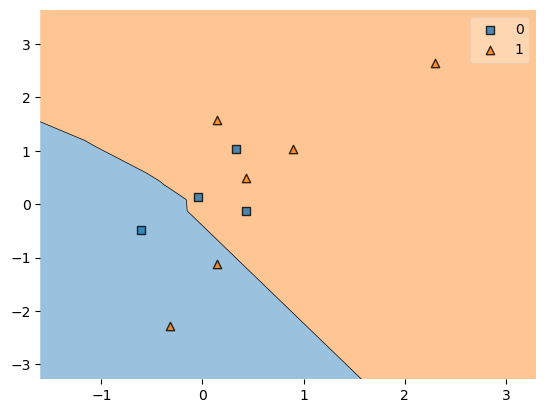

In [93]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)